In [1]:
import pandas as pd



In [2]:
# Load the dataset
df = pd.read_csv('C:\\Users\\Aniket\\Downloads\\Excelr Assignments\\MLR\\ToyotaCorolla - MLR.csv')

In [3]:
# Display basic information and the first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950    

In [4]:
# Summary statistics
print(df.describe(include='all'))


               Price    Age_08_04             KM Fuel_Type           HP  \
count    1436.000000  1436.000000    1436.000000      1436  1436.000000   
unique           NaN          NaN            NaN         3          NaN   
top              NaN          NaN            NaN    Petrol          NaN   
freq             NaN          NaN            NaN      1264          NaN   
mean    10730.824513    55.947075   68533.259749       NaN   101.502089   
std      3626.964585    18.599988   37506.448872       NaN    14.981080   
min      4350.000000     1.000000       1.000000       NaN    69.000000   
25%      8450.000000    44.000000   43000.000000       NaN    90.000000   
50%      9900.000000    61.000000   63389.500000       NaN   110.000000   
75%     11950.000000    70.000000   87020.750000       NaN   110.000000   
max     32500.000000    80.000000  243000.000000       NaN   192.000000   

          Automatic           cc        Doors  Cylinders        Gears  \
count   1436.000000   1436

In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop or impute missing values
# Example: Dropping rows with missing values
df.dropna(inplace=True)


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [8]:
print(df.columns)

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [9]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)


In [10]:
# Define feature variables (X) and target variable (y)
X = df.drop(['Price'], axis=1)
y = df['Price']


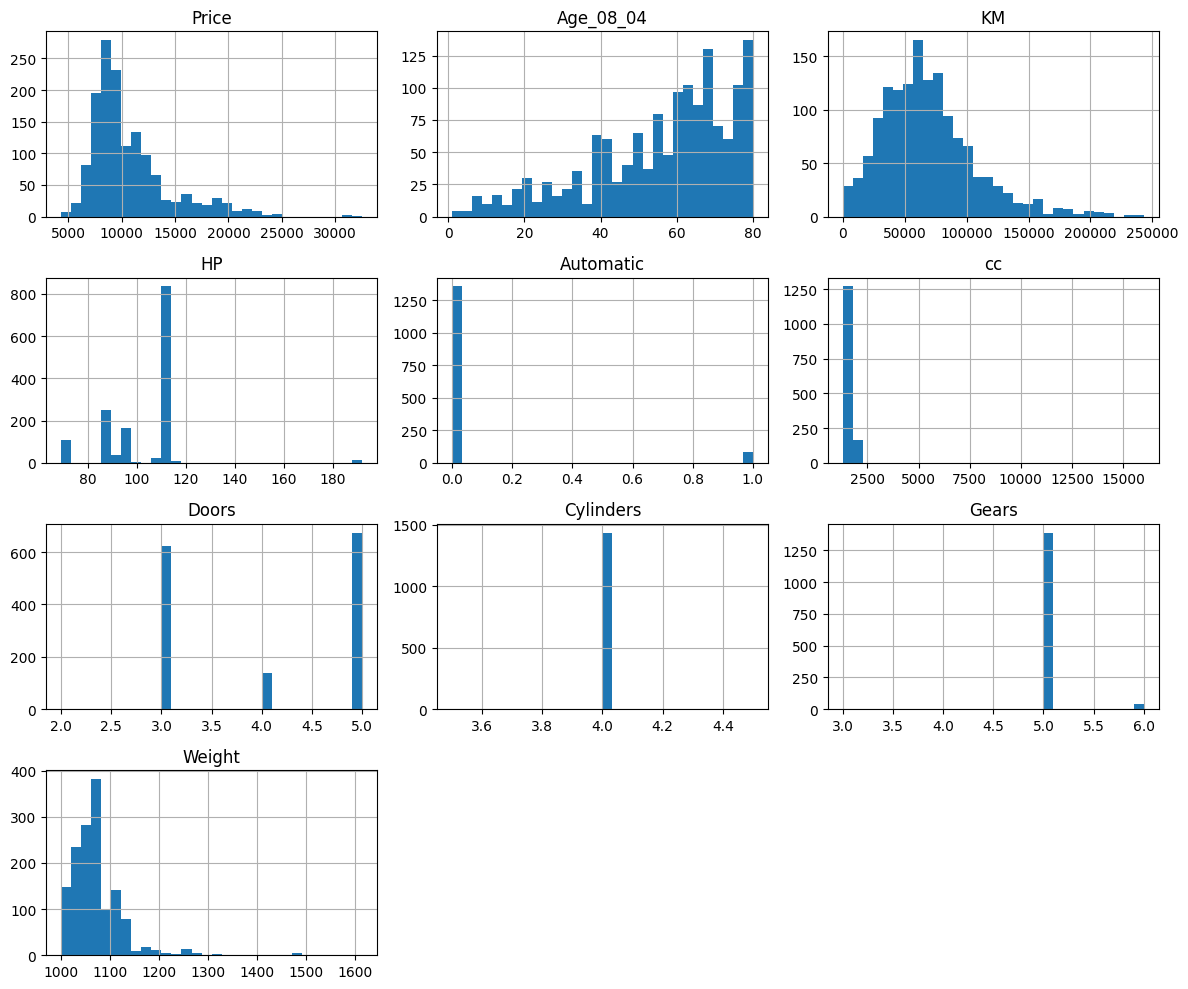

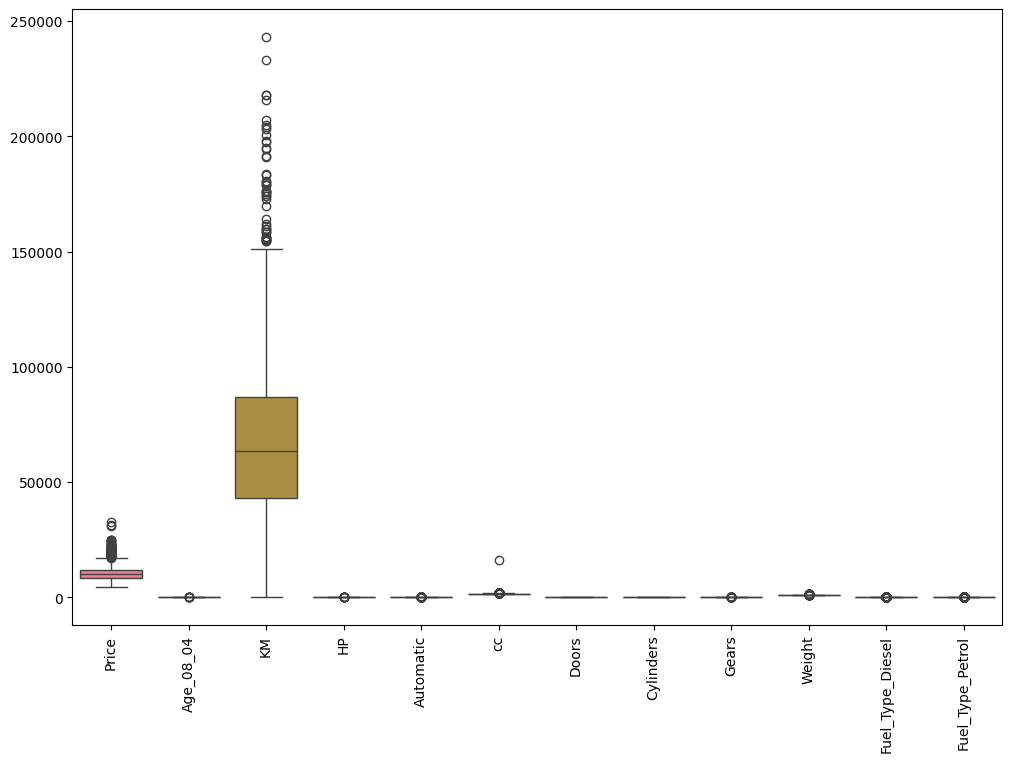

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical features
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# Boxplot for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


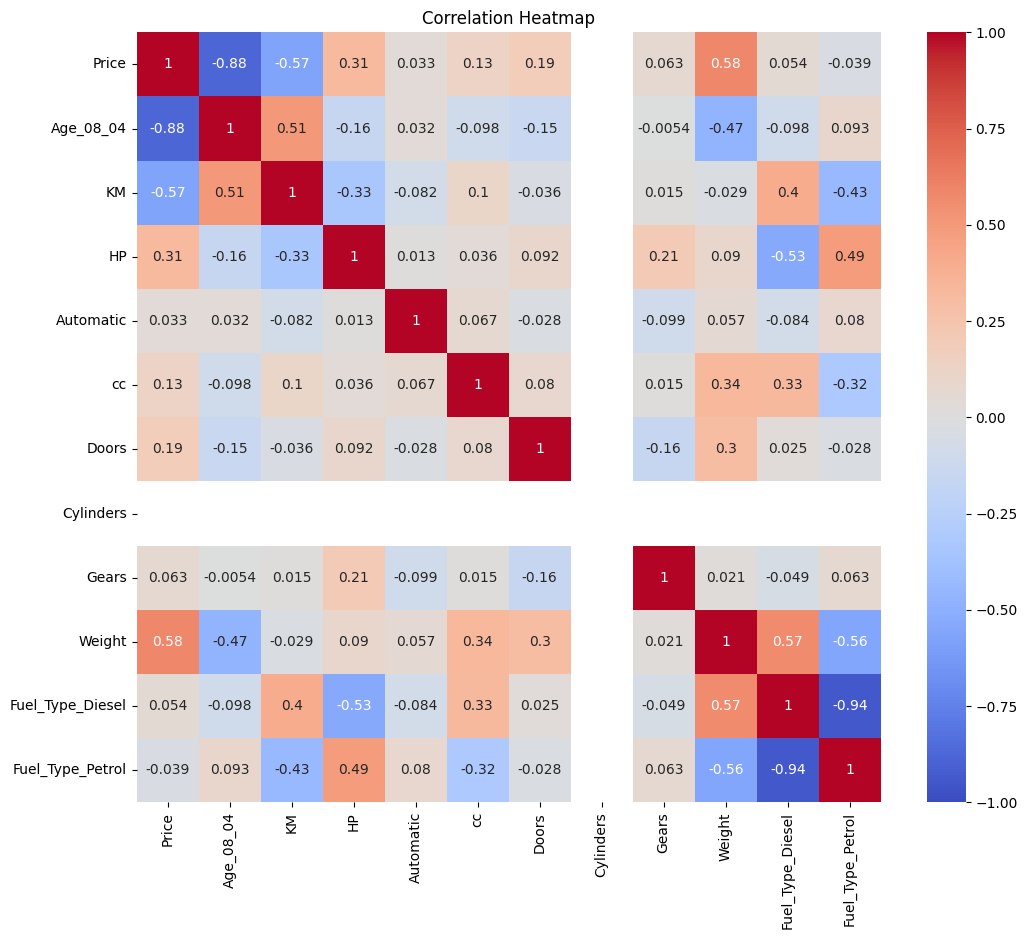

In [12]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Coefficients and intercept
print("Model 1 Coefficients:", model1.coef_)
print("Model 1 Intercept:", model1.intercept_)


Model 1 Coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01  1.25055521e-12  5.51600710e+02
  2.58849583e+01 -6.85487568e+01  1.37080891e+03]
Model 1 Intercept: -14255.385993565258


In [15]:
from sklearn.preprocessing import PolynomialFeatures

# Add interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the model
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

# Coefficients and intercept
print("Model 2 Coefficients:", model2.coef_)
print("Model 2 Intercept:", model2.intercept_)


Model 2 Coefficients: [ 8.47542673e+05 -1.18732249e-02 -5.73360462e+02  6.40146854e+02
  3.26425611e+01 -1.85418571e+03 -1.60445935e-06  1.45213131e+04
  7.89158378e+01  3.96368597e+02 -2.58335982e+02  9.84854091e-03
  3.93515548e-04  5.81965312e-01  1.00508692e+01 -9.58869191e-02
  1.30347478e+01 -2.11927097e+05  1.95792379e+02 -8.17330431e-01
  5.56386555e+01 -4.71106858e+01 -8.71459633e-08 -2.35276224e-04
 -2.41305773e-03  1.81127143e-06 -3.44478570e-03 -5.32433717e-02
 -1.77336987e-03  2.08384408e-04  7.28247403e-03  2.50497845e-02
  4.98492931e-01 -2.09013794e+02 -6.41135236e-02 -1.21380086e+01
 -2.29344175e+03  4.78388718e+02  8.76143197e-02  7.34474556e+03
  7.26548180e+03  6.40146848e+02  1.48077932e+01 -3.00874177e+02
  2.56058739e+03 -5.70639115e+03 -4.82291549e+00 -9.09494702e-13
  2.18571720e+04 -1.50029271e-03 -3.57250910e-01  1.30570248e+02
 -4.00612070e+00  2.12807505e-02 -5.34390074e+02 -5.37212881e+02
 -2.59077499e+02 -7.41674285e+03  5.48030484e+03  7.00099334e+00
 -4

In [16]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the scaled model
model3 = LinearRegression()
model3.fit(X_train_scaled, y_train)

# Coefficients and intercept
print("Model 3 Coefficients:", model3.coef_)
print("Model 3 Intercept:", model3.intercept_)


Model 3 Coefficients: [-2.26729478e+03 -6.11654412e+02  2.08349858e+02  3.43971298e+01
 -1.41619166e+01 -5.74678039e+01  1.42108547e-13  1.09340417e+02
  1.31681831e+03 -2.17221726e+01  4.58047731e+02]
Model 3 Intercept: 10754.395470383277


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test_poly)
y_pred3 = model3.predict(X_test_scaled)

# Evaluate Model 1
print("Model 1 MSE:", mean_squared_error(y_test, y_pred1))
print("Model 1 R^2 Score:", r2_score(y_test, y_pred1))

# Evaluate Model 2
print("Model 2 MSE:", mean_squared_error(y_test, y_pred2))
print("Model 2 R^2 Score:", r2_score(y_test, y_pred2))

# Evaluate Model 3
print("Model 3 MSE:", mean_squared_error(y_test, y_pred3))
print("Model 3 R^2 Score:", r2_score(y_test, y_pred3))


Model 1 MSE: 2203043.8231437006
Model 1 R^2 Score: 0.8348888040611084
Model 2 MSE: 3198387.672026727
Model 2 R^2 Score: 0.7602909174766361
Model 3 MSE: 2203043.823143704
Model 3 R^2 Score: 0.8348888040611081


In [18]:
from sklearn.linear_model import Lasso, Ridge

# Initialize and fit Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Initialize and fit Ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluate Lasso model
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso R^2 Score:", r2_score(y_test, y_pred_lasso))

# Evaluate Ridge model
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R^2 Score:", r2_score(y_test, y_pred_ridge))


Lasso MSE: 2202739.480842682
Lasso R^2 Score: 0.8349116135580272
Ridge MSE: 2202832.135848427
Ridge R^2 Score: 0.8349046693571686
